# Analyse des ventes de l'entreprise «Rester livres»

*Etude data - Projet 4 - Nalron (octobre 2019)* /
*OpenClassrooms - ENSAE-ENSAI Formation Continue*

---

# Mission 3 : les corrélations…
**Les corrélations indiquent si deux variables sont linéairement équivalentes.**

Voici quelques questions supplémentaires pour nous aider à mieux comprendre les ventes enregistrées.

- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
- Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?
- Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) ?
- Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?
- Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

#### Un peu de théorie :

Pour reprendre la définition de *Wikipédia* que je trouve plutôt bien trouvée : 

"En probabilités et en statistique, la corrélation entre plusieurs variables aléatoires ou statistiques est une notion de liaison qui contredit leur indépendance."

## Préparation des données : Jointure des 3 dataframes
Il est judicieux, pour plus compréhension, d'ajouter une colonne 'age'.

In [83]:
#Utilisation du dataframe df résultant de la jointure de df_customers, df_transactionsv1_products
df['age'] = 2022 - df.birth

In [84]:
#Visualisation rapide des catégories de df
df.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
price                float64
categ                  int64
age                    int64
dtype: object

In [85]:
#Visualisation rapide de dataframe df
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,11.53,0,55
1,c_4410,f,1967,0_1390,2021-09-24 23:35:40.652636,s_94984,19.37,0,55
2,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1,55
3,c_4410,f,1967,1_267,2021-09-24 23:15:59.919591,s_94984,27.99,1,55
4,c_4410,f,1967,1_395,2021-09-24 23:57:35.138518,s_94984,28.99,1,55


## Première approche des corrélations sur l'ensemble de nos variables numériques

In [86]:
#Utilisation de la méthode .corr()
df.corr().head()

,birth,price,categ,age
birth,1.000000,0.210044,0.094550,-1.000000
price,0.210044,1.000000,0.669035,-0.210044
categ,0.094550,0.669035,1.000000,-0.094550
age,-1.000000,-0.210044,-0.094550,1.000000


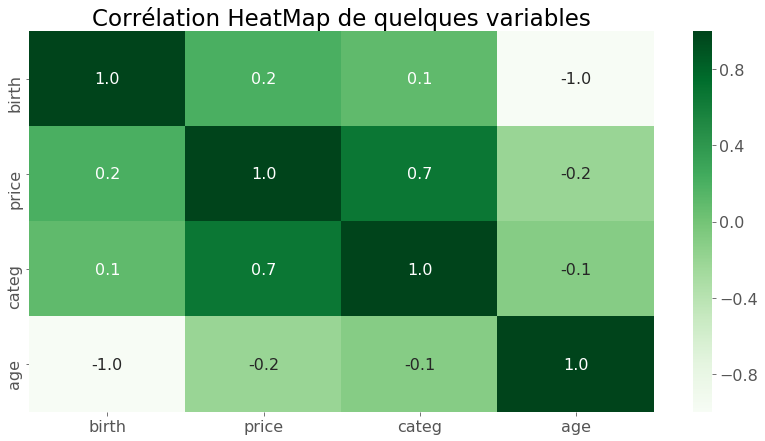

In [87]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap de quelques variables')
plt.savefig("p4_graphic/heatmap_global.png")
plt.show()

*Cet HeatMap renvoie une première image des possibles corrélations linéaires. Par exemple, et sans suprise, les prix produits / catégories sont fortement corrélés. Dans notre contexte cette analyse se révèle trop succincte, d'autres tests doivent-être menés au cas par cas…*

## Analyse de la corrélation entre le sexe des clients et les catégories de produits achetés

In [88]:
#Création du tableau de contingence "Matrice des valeurs observées"
#Variables 'sex' et 'categ' du dataframe df
X = 'sex'
Y = 'categ'

#Calcul du tableau de contigence par la méthode .pivot_table()
c = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) ###, margins=True, margins_name='Total'
tx = df[X].value_counts()
ty = df[Y].value_counts()

#Création d'une copie du dataframe original
cont = c.copy()
cont

categ,0,1,2
sex,,,
f,94218,54497,7693
m,95507,53230,8680


In [89]:
#Création de la "Matrice des valeurs attendues"
#L’occurrence attendue est simplement la fréquence que l’on devrait trouver dans une cellule 
#si l’hypothèse nulle était vraie.
tx_df= pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ["s"]
ty_df.columns = ["s"]

#Valeurs totales observées
n = len(df)

#Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df.dot(ty_df.T) / n)
indep

,0,1,2
m,95167.498845,54036.680185,8212.82097
f,94557.501155,53690.319815,8160.17903


In [90]:
#Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (c-indep)**2/indep
mesure

categ,0,1,2
f,1.218952,12.120116,26.746502
m,1.211139,12.042430,26.575064


In [91]:
#Calcul du Chi2
#Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) 
#avec les occurrences attendues.
chi2 = mesure.sum().sum()
chi2

79.91420286628872

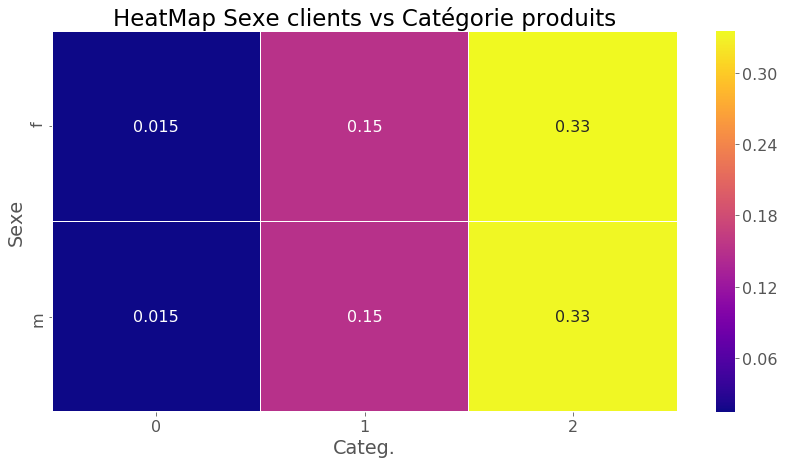

In [92]:
#HeatMap 
table = (mesure/chi2)
sns.heatmap(table, annot=True, cmap="plasma", linewidths=0.1)

plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.xlabel('Categ.')
plt.ylabel('Sexe')

plt.savefig("p4_graphic/heatmap_sexe_categories.png")
plt.show()

Le test de Chi2 est utilisé pour tester l'hypothèse nulle (H0) d'absence de relation entre deux variables catégorielles, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

La valeur de Chi2 est une quantification de cet écart (entre les occurences attendues et celles observées). Plus la valeur sera élevée, plus l'écart entre l'hypothèse nulle et la situation réelle sera grand.

Plus l’occurrence observée est près de l’occurrence attendue, plus la fraction calculée pour chaque cellule est petite et moins l’écart avec H0 est grand. 

In [93]:
#Calcul du khi2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(79.91420286628872, 2, 4.434568162842409e-18)

*L'indice élevé du Chi2 démontre une importance significative entre les occurences théoriques et celles du tableau de contigence. De plus, la comparaison de p-value (4e-16%) avec notre seuil de significativité (traditionnellement 5%) expose une valeur inférieure au seuil. L'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il existe donc un lien entre le sexe des clients et les catégories produits.* 

## Analyse de la corrélation entre l'âge clients et le montant total des achats

In [94]:
#Agrégation pour sommer les ventes 'price' (produits achetés) en fonction de l'âge des clients
#Création d'une variable 'age_price'
age_price = df.groupby('age').sum().reset_index()
age_price = age_price[['age', 'price']].sort_values(by='age', ascending=False) 
age_price['price'] = age_price['price'] / 1000 #Valeurs exprimées en K€

age_price.head() #Apperçu des données âges / ventes

,age,price
75,93,1.27526
74,92,1.97372
73,91,1.30866
72,90,2.34654
71,89,2.45363


In [95]:
age_price.tail()

,age,price
4,22,75.59532
3,21,80.60593
2,20,84.11059
1,19,83.07037
0,18,277.54029


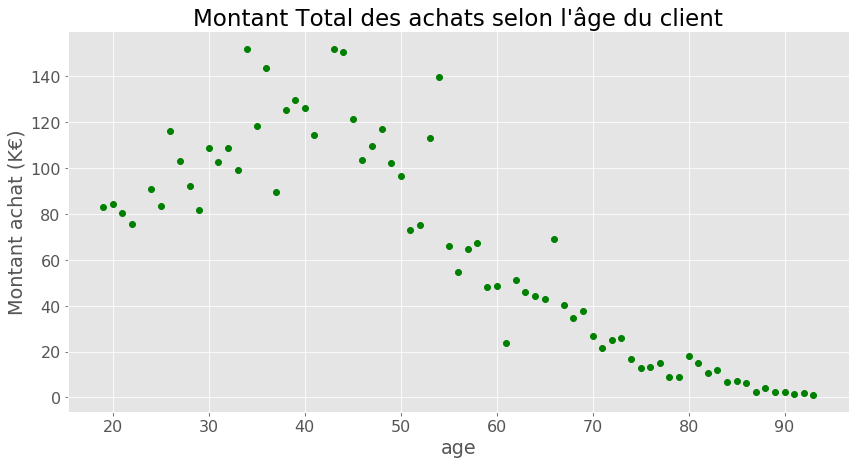

In [96]:
#Visualisation avec un scatterplot (âge clients vs montant total des achats)
plt.plot(age_price[age_price.price < 200].age, age_price[age_price.price < 200].price, 'o', color='green')

plt.xlabel('age')
plt.ylabel('Montant achat (K€)')
plt.title('Montant Total des achats selon l\'âge du client')

plt.savefig("p4_graphic/scatterplot_montant_achat_age_client.png")
plt.show()

In [97]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = st.pearsonr(age_price.age, age_price.price)[0]
coef_age_price

-0.7752574073391366

Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que plus les consommateurs sont agés plus le montant total de leur achat est faible. Or le coefficient est plus proche de -1 que de zéro. Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.(forte correlation)

## Analyse de la corrélation entre l'âge clients et la fréquence d'achat
Ici la fréquence d'achat correspond au nombre d'achats par mois

In [98]:
#Analyse faite à partir du dataframe global df
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,11.53,0,55
1,c_4410,f,1967,0_1390,2021-09-24 23:35:40.652636,s_94984,19.37,0,55
2,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1,55
3,c_4410,f,1967,1_267,2021-09-24 23:15:59.919591,s_94984,27.99,1,55
4,c_4410,f,1967,1_395,2021-09-24 23:57:35.138518,s_94984,28.99,1,55


In [99]:
#Agrégation des données selon l'âge client
#Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
#Hypothèse 1 id_session = 1 transation
customers_freq = df.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]

#Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,f
75,93,84,0.000268
74,92,111,0.000354
73,91,78,0.000249
72,90,141,0.000449
71,89,150,0.000478
70,88,255,0.000813
69,87,132,0.000421
68,86,379,0.001208
67,85,434,0.001383
66,84,416,0.001326


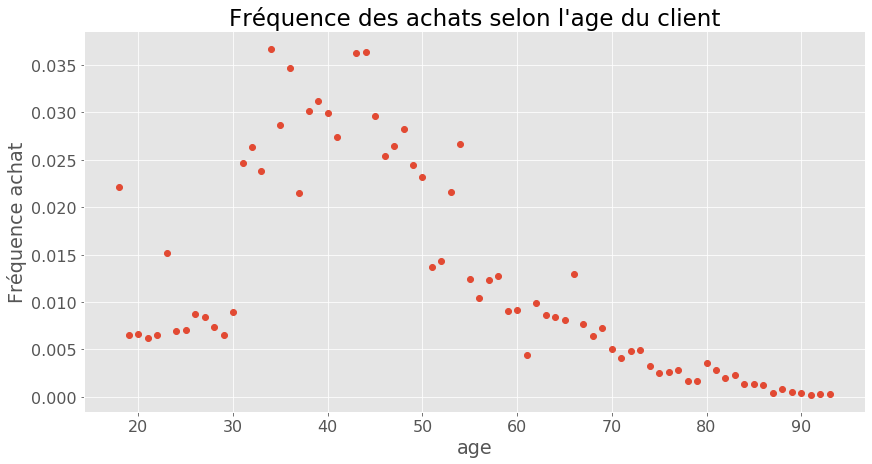

In [100]:
#Visualisation avec un scatterplot (âge client vs fréquence d'achat mensuelle)
#customers_freq.plot.scatter(x = 'age', y = 'f', marker = 'o', color='purple')
plt.plot(customers_freq[customers_freq.f < .05].age, customers_freq[customers_freq.f < .05].f, 'o')

plt.xlabel('age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')

plt.savefig("p4_graphic/scatterplot_frequence_achat_age_client.png")
plt.show()

In [101]:
#Coefficient de corrélation linéaire de Pearson
coef_customers_freq = st.pearsonr(customers_freq.age, customers_freq.f)[0]
coef_customers_freq

-0.5321182987672953

*Corrélation confirmée par le coefficient de Pearson, il existe bien un lien entre l'âge des clients et leurs fréquences d'achat. Il semblerait que des groupes de clients se formalisent sur cette corrélation, par exemple entre 18 et 30 ans.*

## Analyse de la corrélation entre l'âge clients et la taille du panier moyen 
Ici la taille du panier moyen sera exprimée en nombre d'articles

In [102]:
#Analyse faite à partir du dataframe global df
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,11.53,0,55
1,c_4410,f,1967,0_1390,2021-09-24 23:35:40.652636,s_94984,19.37,0,55
2,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1,55
3,c_4410,f,1967,1_267,2021-09-24 23:15:59.919591,s_94984,27.99,1,55
4,c_4410,f,1967,1_395,2021-09-24 23:57:35.138518,s_94984,28.99,1,55


In [103]:
#Première agrégation selon l'age client et les sessions en comptage de modalités
customers_shop = df.groupby(['age', 'session_id']).count().reset_index()

#Seconde agrégation selon l'age client en moyenne de produits achetés 
customers_shop = customers_shop.groupby('age').mean().reset_index()
customers_shop = customers_shop[['age', 'id_prod']]
customers_shop.tail()

,age,id_prod
71,89,1.415094
72,90,1.516129
73,91,1.772727
74,92,1.608696
75,93,1.354839


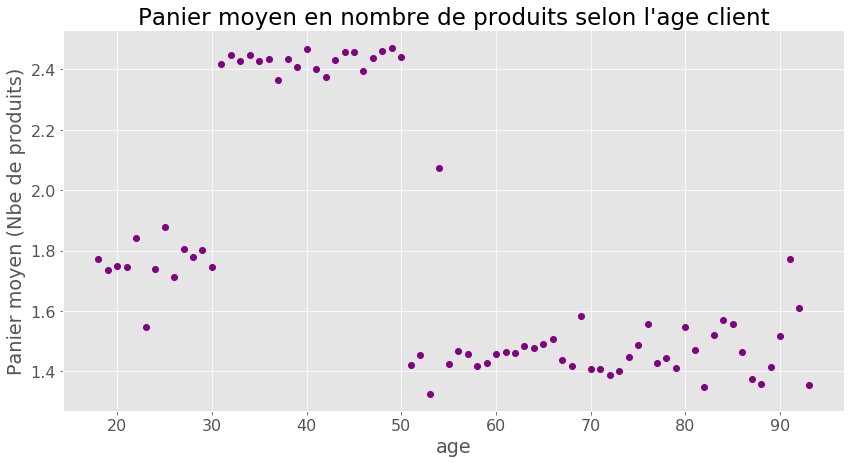

In [104]:
#Visualisation avec un scatterplot (âge client vs taille panier moyen)
plt.plot(customers_shop.age, customers_shop.id_prod, 'o', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.savefig("p4_graphic/scatterplot_panier_moyen_age_client.png")
plt.show()

In [106]:
#Subsets pour identifier les clusters clients 
customers_shop31 = customers_shop[customers_shop.age < 31]
customers_shop3050 = customers_shop[(customers_shop.age > 31) & (customers_shop.age < 50)]
customers_shop50 = customers_shop[customers_shop.age > 51]

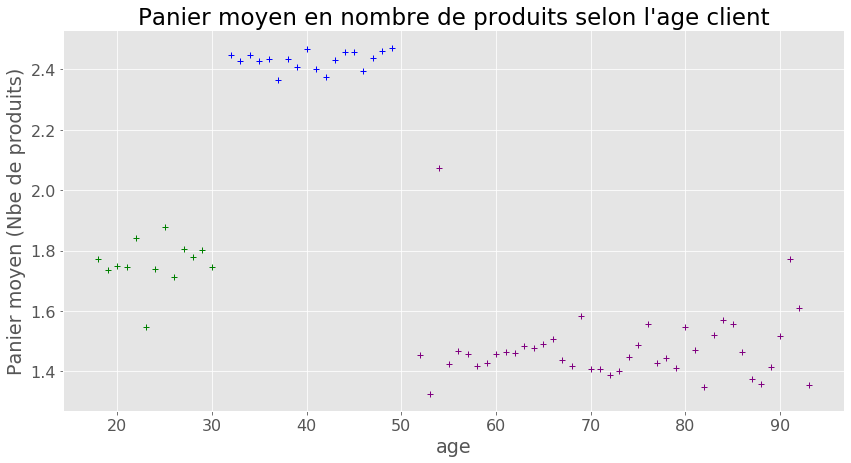

In [107]:
#Visualisation avec scatterplot selon les groupes d'individus identifiés
plt.plot(customers_shop31.age, customers_shop31.id_prod, '+', color='green')
plt.plot(customers_shop3050.age, customers_shop3050.id_prod, '+', color='blue')
plt.plot(customers_shop50.age, customers_shop50.id_prod, '+', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.savefig("p4_graphic/scatterplot_panier_moyen_age_client_clusters.png")
plt.show()

In [108]:
#Coefficient de corrélation linéaire de Pearson
coef_customers_shop = st.pearsonr(customers_shop.age, customers_shop.id_prod)
coef_customers_shop 

(-0.5769136480926942, 4.905833323312418e-08)

*Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. Par exemple, sur les individus de plus de 50 ans, le panier moyen reste faible. Il existe également un lien sur les individus de 18 à 30 ans et de 30 à 50 ans. La linéarité de la corrélation existe mais selon des corpus de clients visiblement distincts, par tranches d'âges.*

## Analyse de la corrélation entre l'âge clients et la catégorie produits

Afin de simplifier l'analyse, il est nécessaire de procéder par un découpage en classes (discrétisation). Donc très clairement le but est de pouvoir réduire nos individus "âges" par classes, de manière à pouvoir interpréter plus facilement les résultats.

**Comment choisir le nombre de classes?**

Avec par exemple la formule de Sturges-Huntsberger : k = 1 + 3.33*log(N,base=10)

ou encore   Brooks-Carruthers : k = 5*log(N,base=10) 


In [109]:
#N est le nombre d'observations, ici représentées par les valeurs transactionnelles par âge et par catégorie
len(df.groupby(['age', 'categ']).count().reset_index())

227

In [110]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
1 + ((10/3) * mth.log10(227))

8.853419523977076

In [111]:
#Formule de Brooks-Carruthers : 5*log10(N)
5 * mth.log10(227)

11.780129285965613

*Dans notre contexte, nous pouvons retenir un nombre de classes de 9.*

In [112]:
#Méthode .groupby() pour agréger les données selon l'âge et la catégorie
age_categ = df.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]
age_categ.head()

,age,categ,session_id
0,18,0,1527
1,18,1,2701
2,18,2,2723
3,19,0,429
4,19,1,800


In [113]:
#Méthode .cut() pour créer les 9 groupes d'âges, une segmentation des individus 'age'
age_categ['age']= pd.cut(age_categ['age'], 9)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()
age_categ.head(10)

,age,categ,session_id
0,"(17.925, 26.333]",0,5418
1,"(17.925, 26.333]",1,10356
2,"(17.925, 26.333]",2,11208
3,"(26.333, 34.667]",0,28712
4,"(26.333, 34.667]",1,12144
5,"(26.333, 34.667]",2,3964
6,"(34.667, 43.0]",0,73516
7,"(34.667, 43.0]",1,23466
8,"(34.667, 43.0]",2,262
9,"(43.0, 51.333]",0,47656


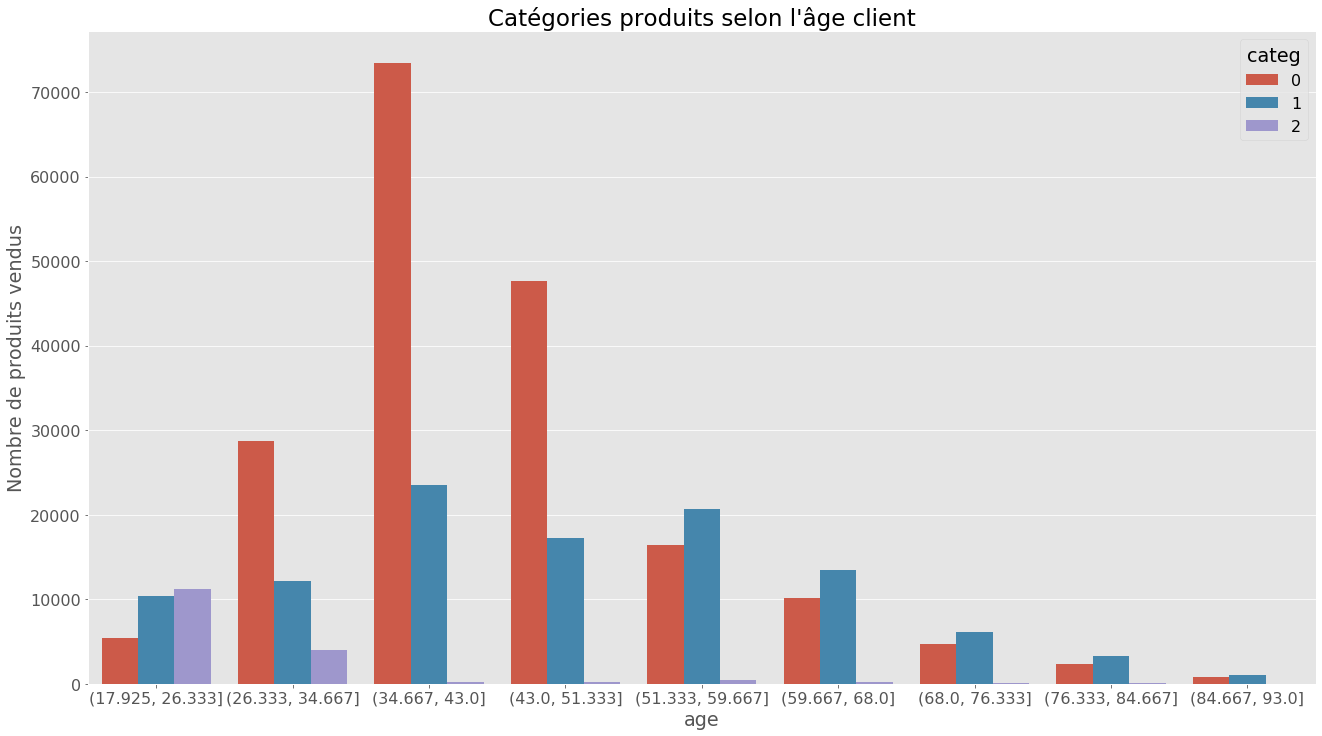

In [114]:
#Visualisation rapide avec une BarPlot Seaborn
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=age_categ)

ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits selon l\'âge client')

plt.savefig("p4_graphic/barplot_categorie_produit_age_client")
plt.show()

In [115]:
#Coefficient de corrélation eta carré
X = "categ" #qualitative
Y = "age" #quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [116]:
round(eta_squared(age_categ.age, age_categ.session_id), 2)

0.35

*Le rapport de corrélation est proche de 0.40, ce qui précise le précédent graphique dans lequel une certaine corrélation entre les catégories et l'âge client. Il est perceptible de voir le lien que peut avoir une catégorie en fonction d'une tranche d'âges, avec par exemple un fort succès de la catégorie 0 pour les 34 / 44 ans, ou à l'inverse une clientèle plus âgée n'adhère quasiment pas à cette catégorie, etc..*

**En conclusion**

L'analyse exploratoire faite à partir de ces 3 sources de données permettent d'avoir une première approche unidimensionnelle, à savoir la ressemblance entre individus, la variabilité des données, etc. Puis dans un second temps une approche multidimensionnelle permettant d'identifier les différentes corrélations, les liens possibles entre nos variables. 

Il serait interessant de pousser l'analyse sur d'autres aspects business comme celui de l'acquisition du prospect, l'origine de la transaction client, avec par exemple une question : canal internet (si oui dans quel localité se trouve le client?) ou magasin physique (si oui lequel?).